In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time


In [3]:
# Retrieve data from csv
time_data = pd.read_csv("timedata.csv")
time_data.head()

,Unnamed: 0,city,state,year,month,day,hour,minute,converted_timestamp
0,0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00
1,1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00
2,2,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00
3,3,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00
4,4,Dallas,TX,1973,7,14,22,0,1973-07-14 22:00:00


In [4]:
# Bin years into decades
bins = [0,1979,1989,1999,2009,2020]
group_names = ['1969-1979','1980-1989','1990-1999','2000-2009','2010-2019']
time_data['decades'] = pd.cut(time_data['year'],
                             bins, labels=group_names,
                             include_lowest = True)
time_data.head()

,Unnamed: 0,city,state,year,month,day,hour,minute,converted_timestamp,decades
0,0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,2010-2019
1,1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,2010-2019
2,2,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,2010-2019
3,3,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,2010-2019
4,4,Dallas,TX,1973,7,14,22,0,1973-07-14 22:00:00,1969-1979


In [5]:
# Bin hours into day parts
bins = [0,4,8,12,16,20,24]
group_names = ['1AM-4AM','5AM-8AM','9AM-12PM','1PM-4PM','5PM-8PM','8PM-12AM']
time_data['day parts'] = pd.cut(time_data['hour'],
                             bins, labels=group_names,
                             include_lowest = True)
time_data.head()

,Unnamed: 0,city,state,year,month,day,hour,minute,converted_timestamp,decades,day parts
0,0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,2010-2019,5PM-8PM
1,1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,2010-2019,5PM-8PM
2,2,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,2010-2019,5PM-8PM
3,3,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,2010-2019,5PM-8PM
4,4,Dallas,TX,1973,7,14,22,0,1973-07-14 22:00:00,1969-1979,8PM-12AM


<Axes: title={'center': 'Sightings per Year'}, xlabel='year', ylabel='# Sightings'>

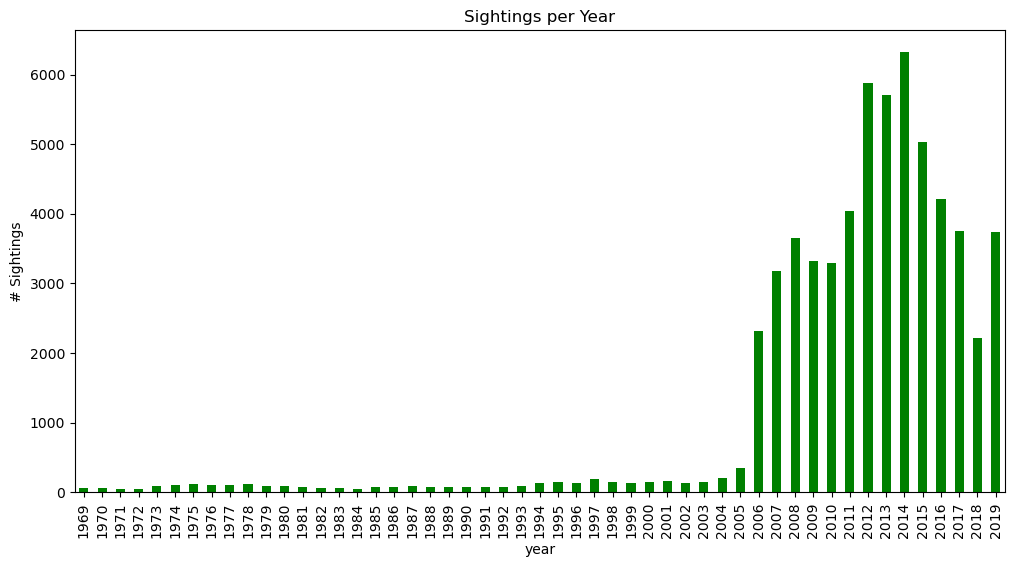

In [6]:
# Count sightings per year and plot
time_data['year'].value_counts().sort_index().plot(kind='bar', color='green',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Year',
                                                   figsize=(12,6))

<Axes: title={'center': 'Sightings per Year'}, xlabel='year', ylabel='# Sightings'>

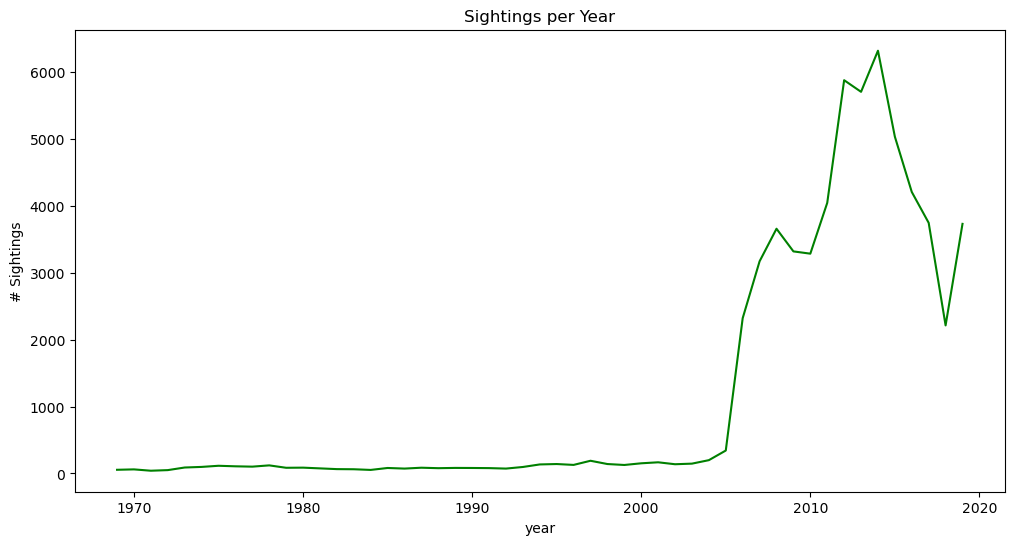

In [6]:
# Count sightings per year and plot
time_data['year'].value_counts().sort_index().plot(kind='line', color='green',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Year',
                                                   figsize=(12,6))

<Axes: title={'center': 'Sightings per Decade'}, xlabel='decades', ylabel='# Sightings'>

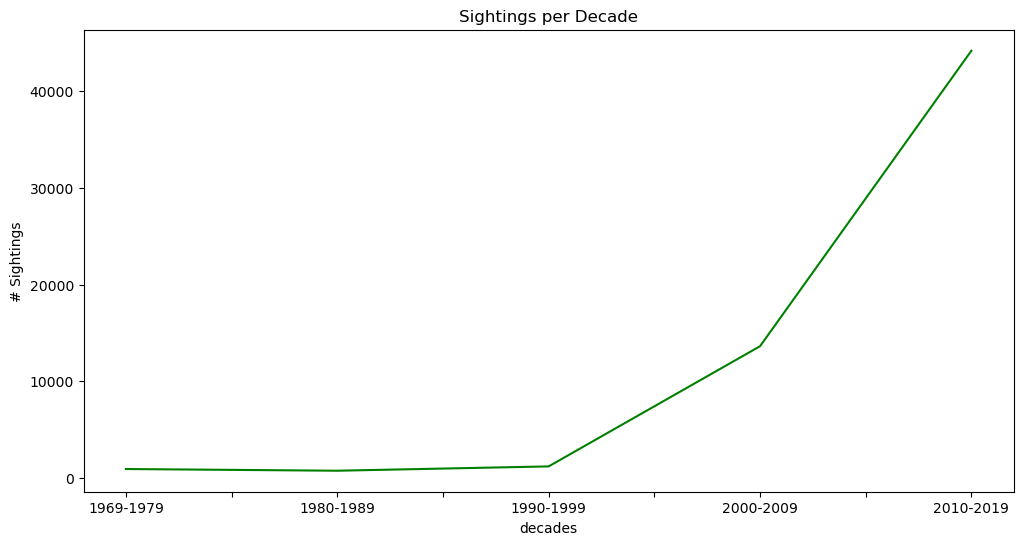

In [7]:
# Count sightings per decade and plot
time_data['decades'].value_counts().sort_index().plot(kind='line', color='green',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Decade',
                                                   figsize=(12,6))

<Axes: title={'center': 'Sightings per Month'}, xlabel='Month', ylabel='# Sightings'>

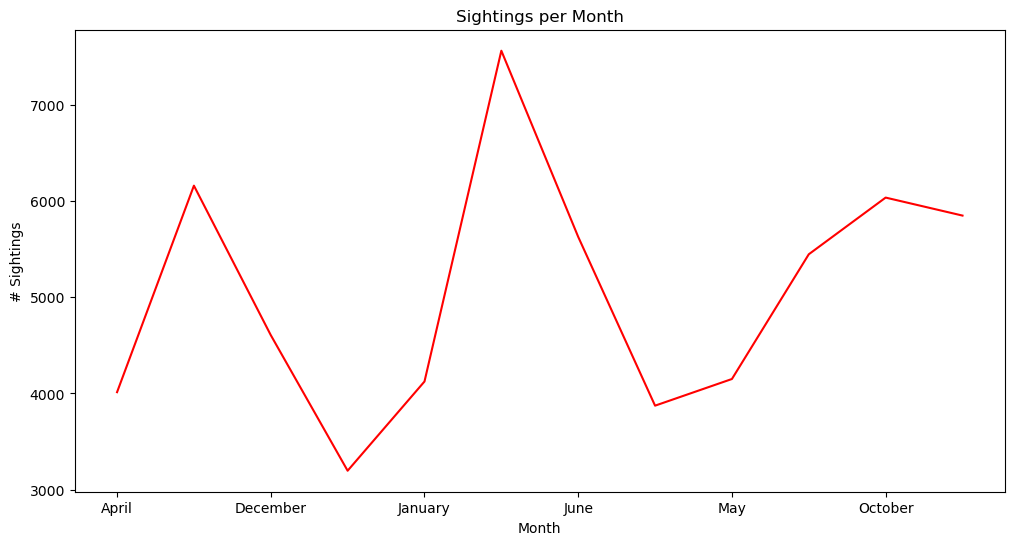

In [13]:
# Count sightings per month and plot
time_data["Month Name"] = time_data["month"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})
time_data['Month Name'].value_counts().sort_index().plot(kind='line', color='red',
                                                   ylabel='# Sightings',
                                                   xlabel='Month',
                                                   title='Sightings per Month',
                                                   figsize=(12,6))

<Axes: title={'center': 'Sightings per Hour'}, xlabel='hour', ylabel='# Sightings'>

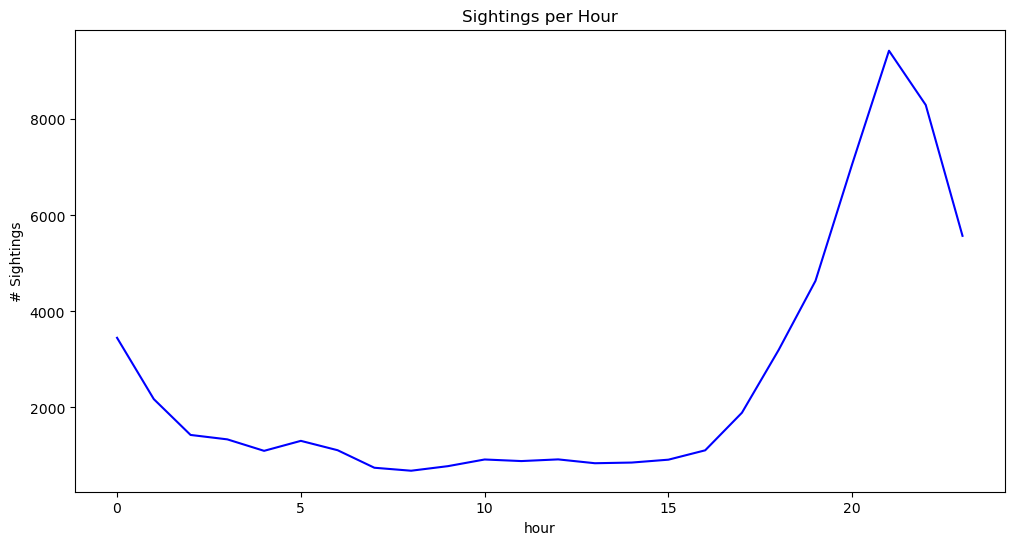

In [9]:
# Count sightings per hour and plot
time_data['hour'].value_counts().sort_index().plot(kind='line', color='blue',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Hour',
                                                   figsize=(12,6))

<Axes: title={'center': 'Sightings per Day Part'}, xlabel='day parts', ylabel='# Sightings'>

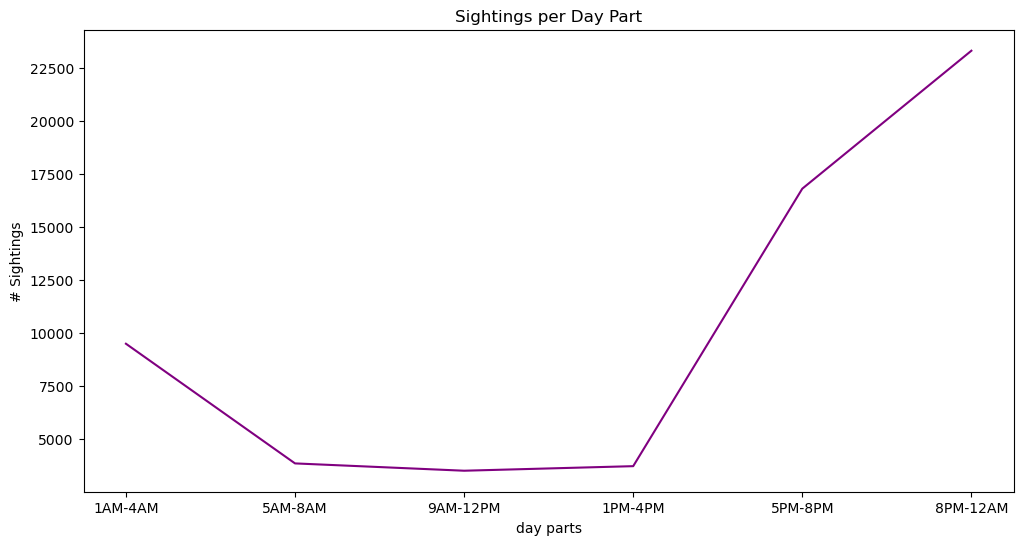

In [10]:
# Count sightings per hour and plot
time_data['day parts'].value_counts().sort_index().plot(kind='line', color='purple',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Day Part',
                                                   figsize=(12,6))

<Axes: title={'center': 'Sightings per Day Part'}, ylabel='count'>

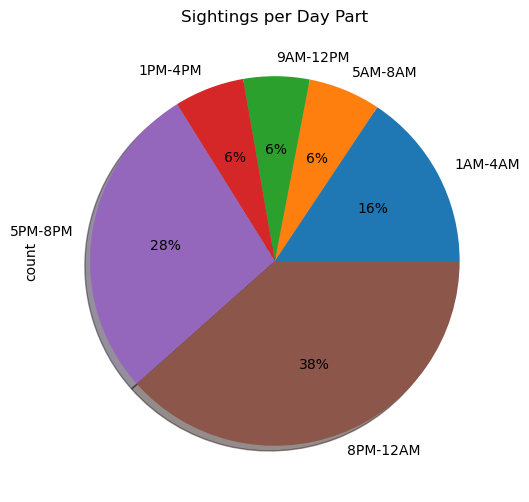

In [12]:
time_data['day parts'].value_counts().sort_index().plot(kind='pie',
                                                        autopct='%1.0f%%',
                                                        shadow=True,
                                                        title='Sightings per Day Part',
                                                        figsize=(12,6))